Default Of Credict Card Client: Machine Learning Project

Seeniya George

Entri Elevate


In [ ]:
### Problem Statement
Financial institutions face challenges in managing credit risk due to client defaults. Using the **Default of Credit Card Clients Dataset**, the goal is to build a machine learning model to:
- Predict the likelihood of a client defaulting on their credit card payments.
- Provide actionable insights to improve lending decisions and risk-based pricing


In [ ]:
### Objective
The project aims to:
1. Develop a **classification model** to predict whether a client will default.
2. Use model predictions to categorize clients into **low**, **medium**, and **high-risk groups**.
3. Interpret feature importance to derive actionable business insights.



In [ ]:
 Dataset Overview

### Data Source
The **Default of Credit Card Clients Dataset** contains:
- 30,000 records of credit card clients.
- Features include demographic, financial, and behavioral attributes (e.g., age, credit limit, payment history).
- Target variable: `default.payment.next.month` (1 = default, 0 = no default).


Loading necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, roc_curve, auc
from scipy.stats import uniform
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

Load the dataset and examine its structure.


In [4]:
print("Loading default of credict card client...")
df=pd.read_csv('credit_customer.csv')
df.head(10)

Loading default of credict card client...


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df.shape

(30000, 25)

In [32]:
#Basic Data Analysis

df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE   PAY_0     PAY_2  \
0          1    20000.0    2        2.0         1  24.0 -0.0167 -0.133767   
1          2   120000.0    2        2.0         2  26.0 -1.0000 -0.133767   
2          3    90000.0    2        2.0         2  34.0  0.0000  0.000000   
3          4    50000.0    2        2.0         1  37.0  0.0000  0.000000   
4          5    50000.0    1        2.0         1  57.0 -1.0000  0.000000   
...      ...        ...  ...        ...       ...   ...     ...       ...   
29995  29996   220000.0    1        3.0         1  39.0  0.0000  0.000000   
29996  29997   150000.0    1        3.0         2  43.0 -1.0000 -1.000000   
29997  29998    30000.0    1        2.0         2  37.0 -0.0167 -0.133767   
29998  29999    80000.0    1        3.0         1  41.0  1.0000 -1.000000   
29999  30000    50000.0    1        2.0         1  46.0  0.0000  0.000000   

        PAY_3  PAY_4  ...  BILL_AMT4  BILL_

In [10]:
df.duplicated().sum()

0

In [11]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
# 3. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


In [14]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [15]:
numeric_columns=df.columns

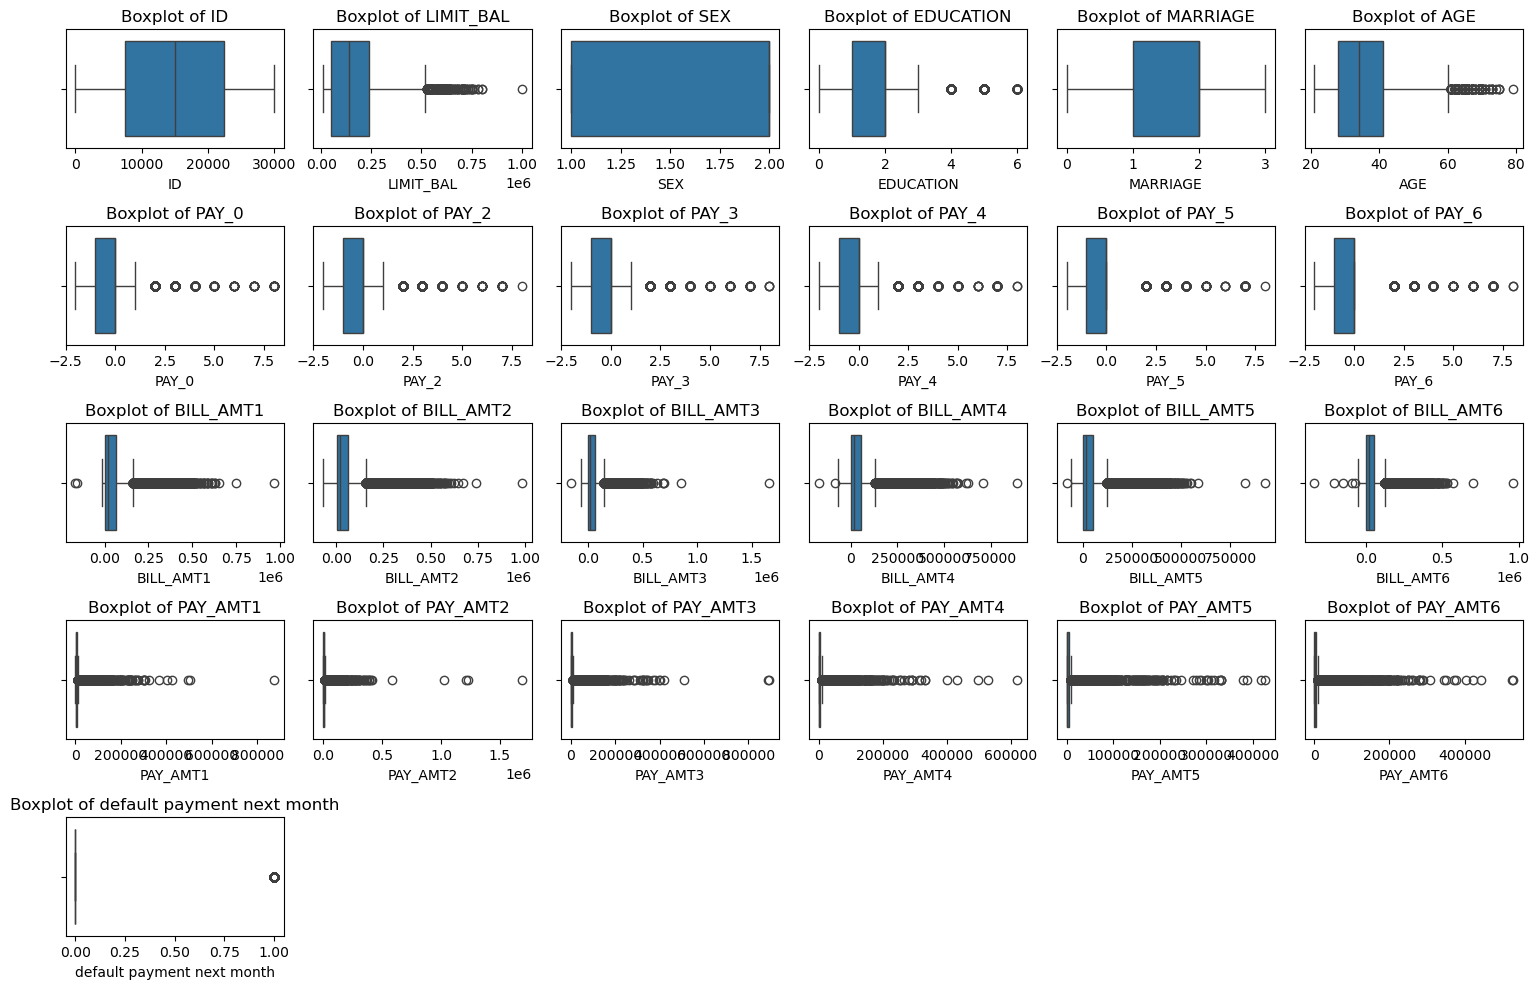

In [16]:
# Visualize columns features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

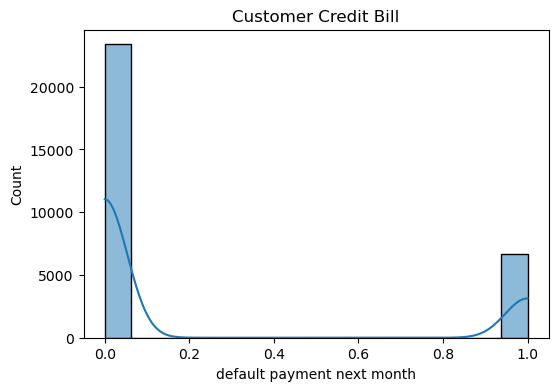

In [17]:
# Plot distribution of target variable (Price)
plt.figure(figsize=(6,4))
sns.histplot(df['default payment next month'], kde=True)
plt.title('Customer Credit Bill')
plt.show()

In [18]:
# Function to detect and cap outliers using IQR
def cap_outliers_iqr(df):
    outliers_dict = {}  # Dictionary to store the number of outliers for each column
    
   
    for column in numeric_columns:  # Only consider numeric columns
        # Calculate the Q1, Q3, and IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify the outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = len(outliers)
        
        # Capping the outliers with the mean value of the column
        mean_value = df[column].mean()
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    
    return df, outliers_dict

# Apply outlier capping
df, outliers_dict = cap_outliers_iqr(df)

# Output the number of outliers per column
print("Outliers in each column:")
for column, outlier_count in outliers_dict.items():
    print(f"{column}: {outlier_count} outliers")

Outliers in each column:
ID: 0 outliers
LIMIT_BAL: 167 outliers
SEX: 0 outliers
EDUCATION: 454 outliers
MARRIAGE: 0 outliers
AGE: 272 outliers
PAY_0: 3130 outliers
PAY_2: 4410 outliers
PAY_3: 4209 outliers
PAY_4: 3508 outliers
PAY_5: 2968 outliers
PAY_6: 3079 outliers
BILL_AMT1: 2400 outliers
BILL_AMT2: 2395 outliers
BILL_AMT3: 2469 outliers
BILL_AMT4: 2622 outliers
BILL_AMT5: 2725 outliers
BILL_AMT6: 2693 outliers
PAY_AMT1: 2745 outliers
PAY_AMT2: 2714 outliers
PAY_AMT3: 2598 outliers
PAY_AMT4: 2994 outliers
PAY_AMT5: 2945 outliers
PAY_AMT6: 2958 outliers
default payment next month: 6636 outliers


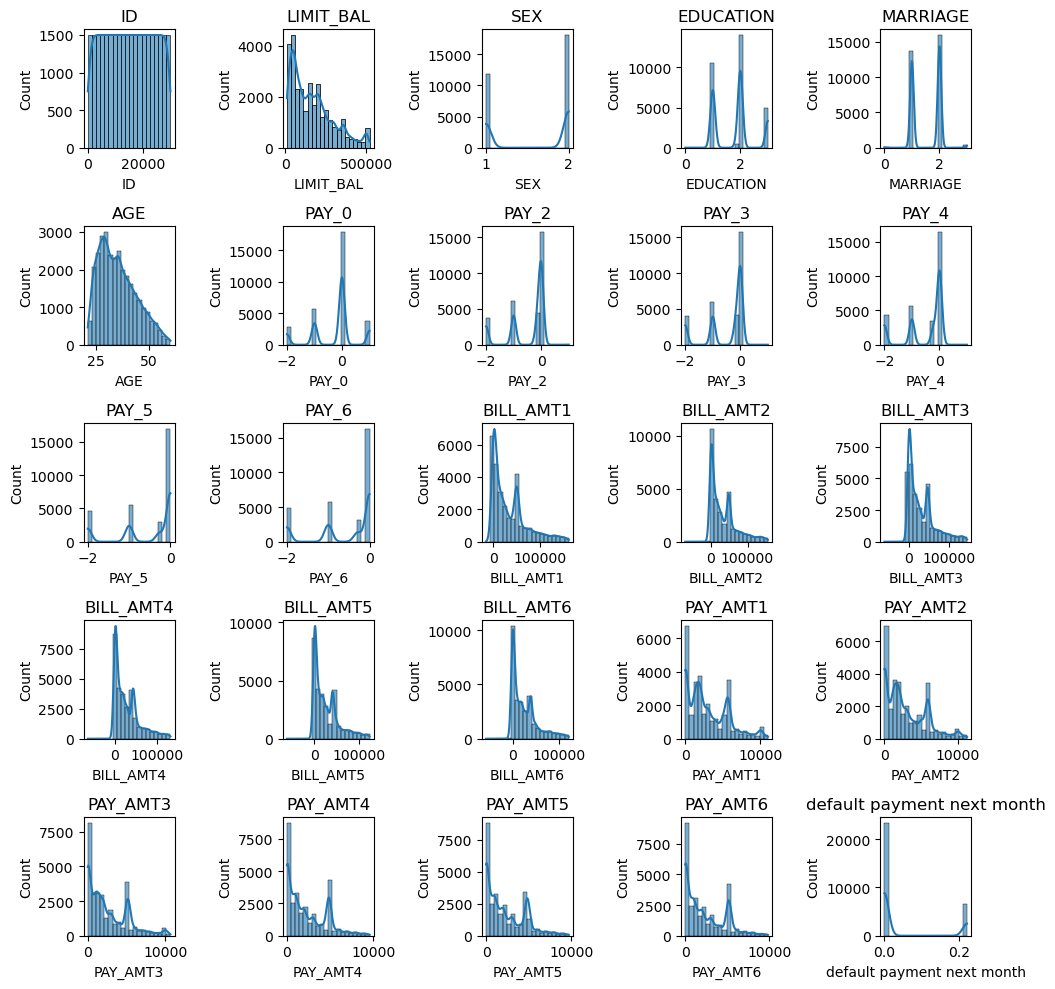

In [19]:
#Distribution plots for all numeric features
plt.figure(figsize=(10, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data=df, x=column, kde=True, bins=20, alpha=0.6, legend=False)  # Set legend=False
    plt.title(column)
    plt.tight_layout()    
plt.show()

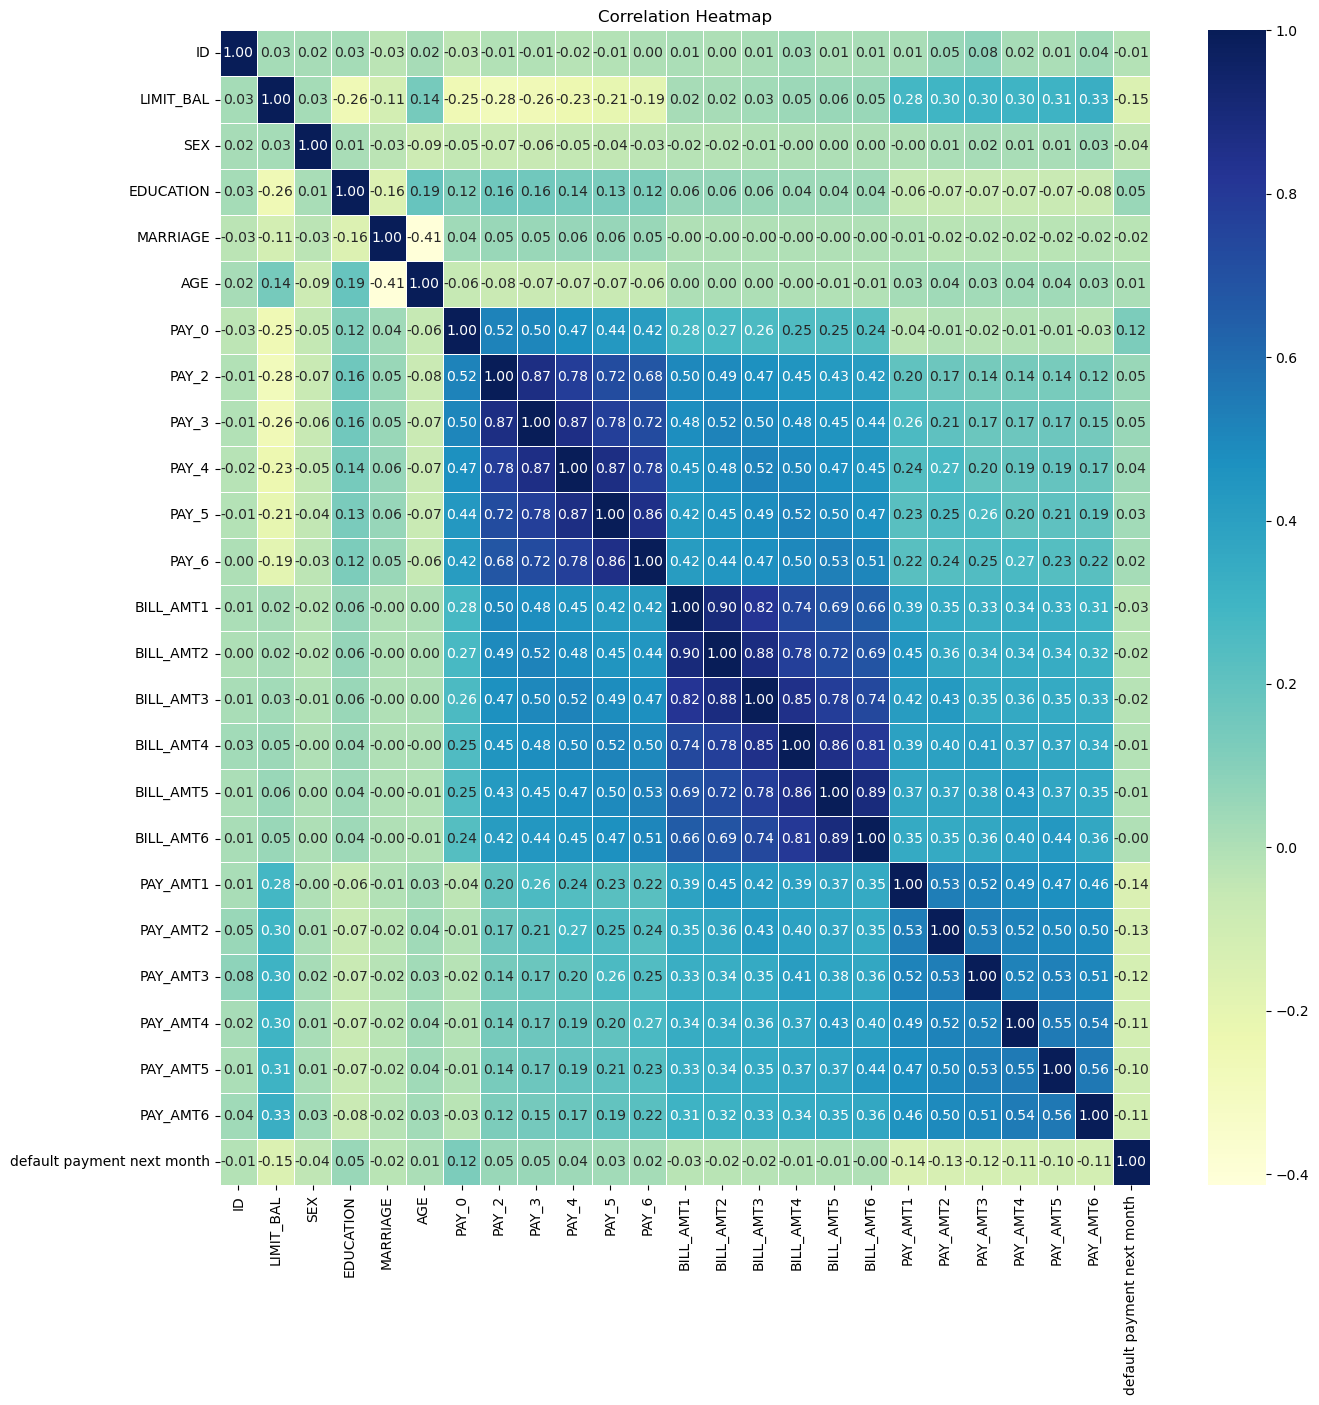

In [20]:
# Calculate correlations
corr_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

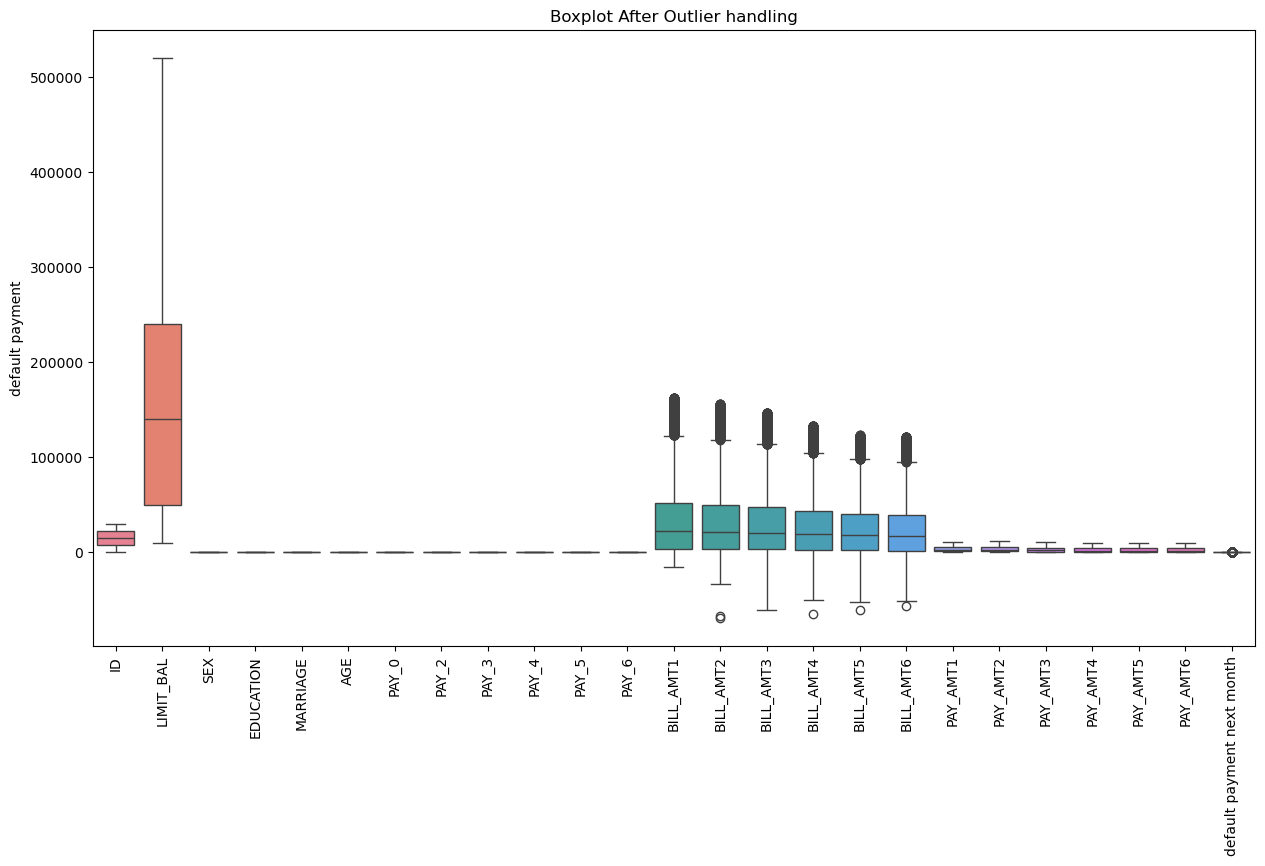

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.title("Boxplot After Outlier handling")
plt.xticks(rotation=90)
plt.ylabel('default payment')
plt.show()

In [22]:
#check skewness of numarical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
#numarical_features
print(df[numerical_features].skew())

ID                            0.000000
LIMIT_BAL                     0.884783
SEX                          -0.424183
EDUCATION                     0.275366
MARRIAGE                     -0.018742
AGE                           0.596075
PAY_0                        -0.659781
PAY_2                        -1.223727
PAY_3                        -1.184935
PAY_4                        -1.156439
PAY_5                        -1.129470
PAY_6                        -1.038313
BILL_AMT1                     1.257988
BILL_AMT2                     1.254389
BILL_AMT3                     1.260984
BILL_AMT4                     1.269023
BILL_AMT5                     1.277431
BILL_AMT6                     1.301287
PAY_AMT1                      0.864059
PAY_AMT2                      0.904559
PAY_AMT3                      1.037988
PAY_AMT4                      0.896425
PAY_AMT5                      0.899043
PAY_AMT6                      0.878967
default payment next month    1.343504
dtype: float64


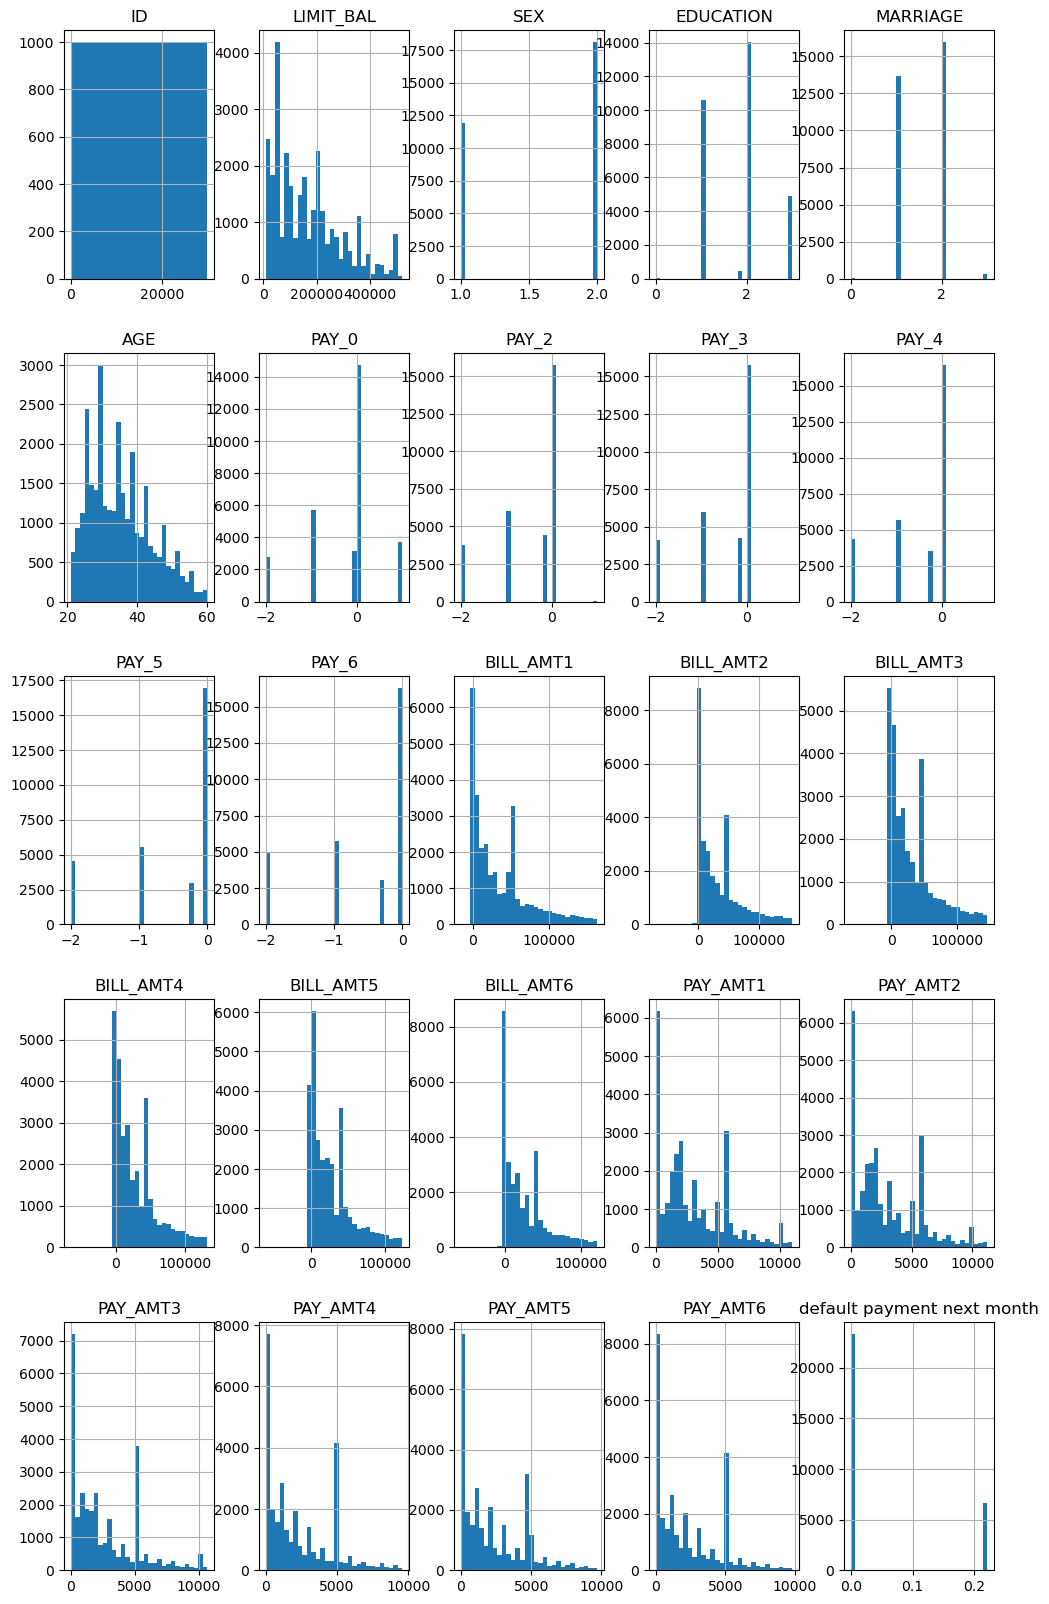

In [23]:
#each columns histogram plot
#plot histograms before transformed features
df.hist(figsize=(12,20),bins=30)
plt.show()

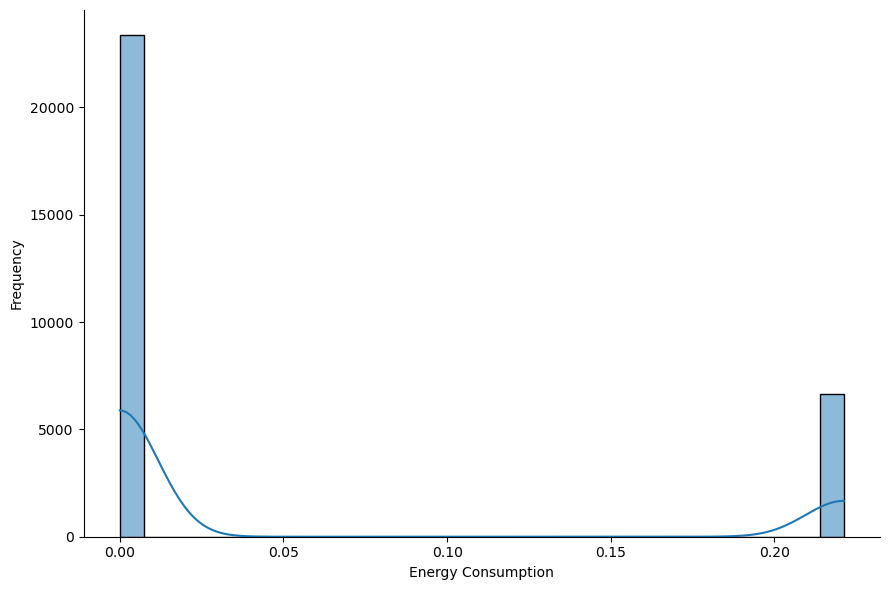

In [24]:
sns.displot(df['default payment next month'], bins=30, kde=True, height=6,aspect=1.5)# create distribution
plt.title('')#set the title of the plot
plt.xlabel('Energy Consumption') #set the label for x-axis
plt.ylabel('Frequency')# set the label for y-axis
plt.show()

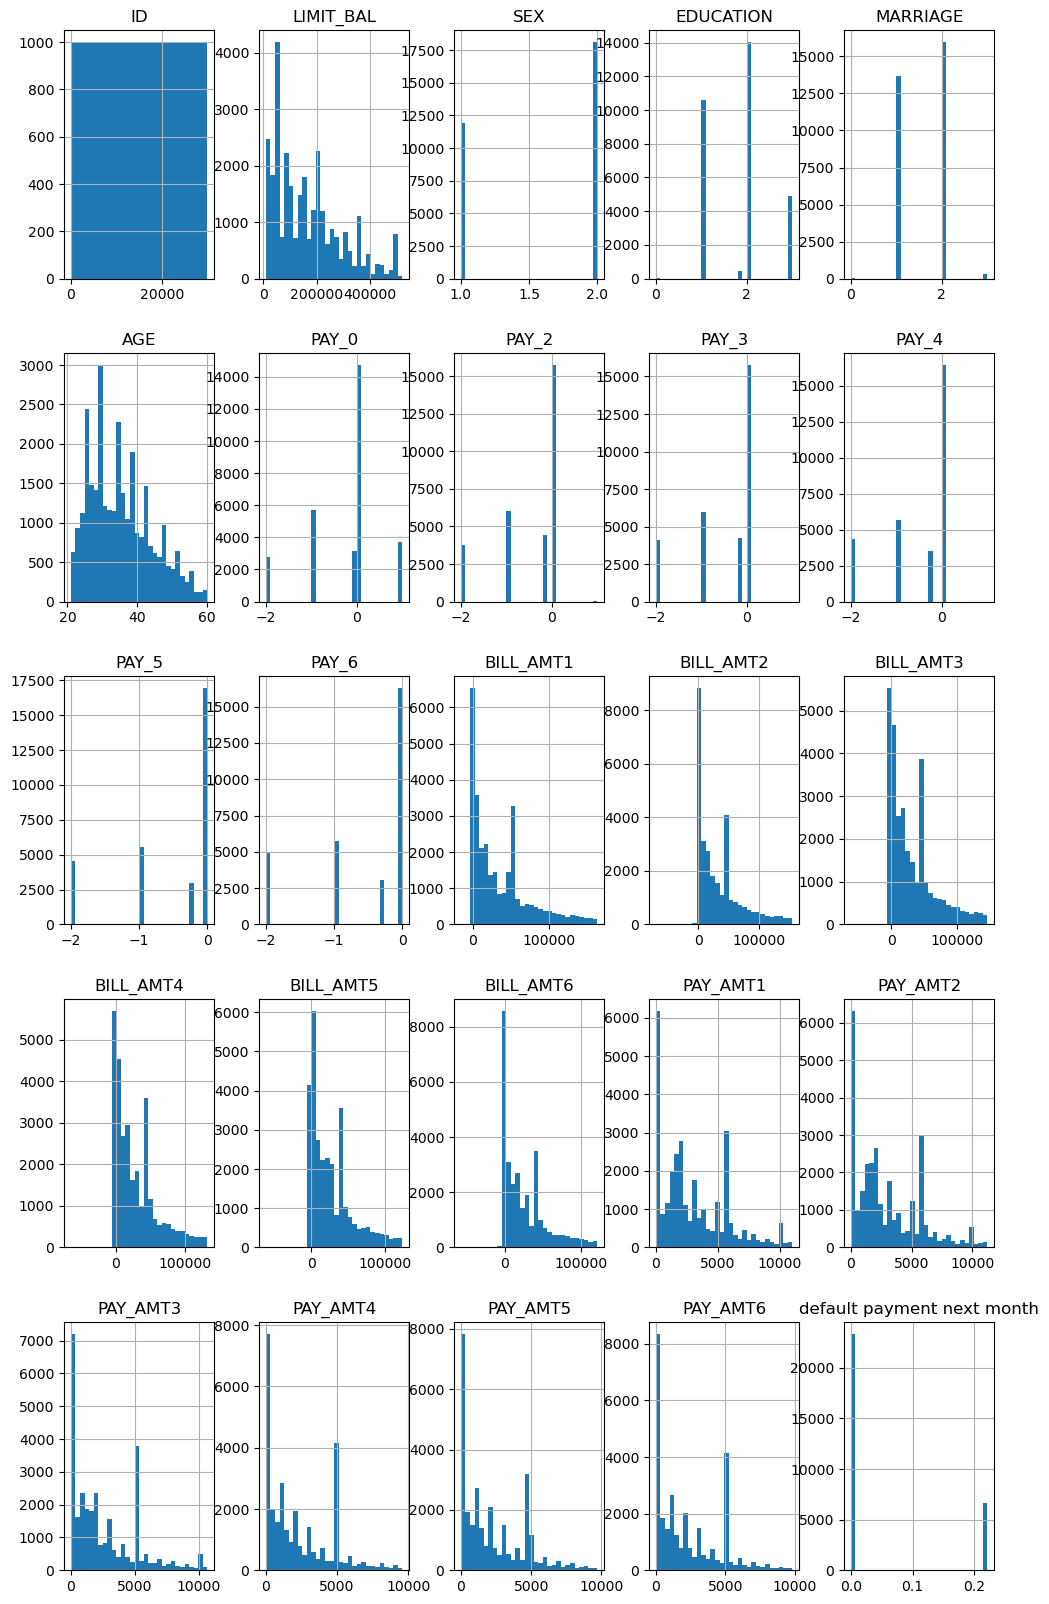

In [25]:
#plot histogram after transformed features
df.hist(figsize=(12,20), bins=30)
plt.show()

In [7]:
df1=pd.DataFrame(df)

In [8]:

# Define target and features
X = df1.drop(columns=['default payment next month'])
y = df1['default payment next month']



In [9]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (30000, 24)
Target shape: (30000,)


In [23]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler



StandardScaler()

In [26]:
corelation=X.corr()
corelation

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565


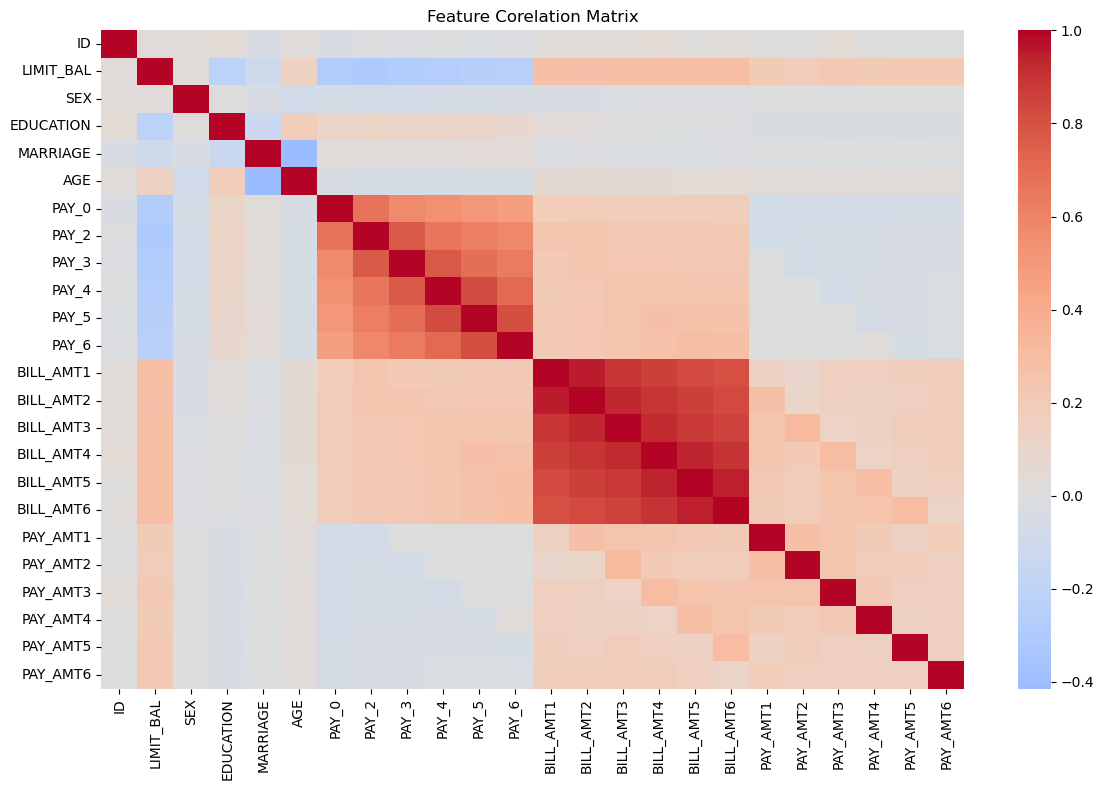

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(corelation, cmap='coolwarm', center=0)
plt.title('Feature Corelation Matrix')
plt.tight_layout()
plt.show()

In [28]:
# Print highly corelated features (correlation > 0.9)
print("\nHighly corelated feature pairs (>0.9):")
for i in range(len(corelation.columns)):
    for j in range(i):
        if abs(corelation.iloc[i, j]) > 0.9:
            print(f"{corelation.columns[i]} <-> {corelation.columns[j]}")
            print(f"Correlation: {corelation.iloc[i, j]:.3f}")


Highly corelated feature pairs (>0.9):
BILL_AMT2 <-> BILL_AMT1
Correlation: 0.951
BILL_AMT3 <-> BILL_AMT2
Correlation: 0.928
BILL_AMT4 <-> BILL_AMT3
Correlation: 0.924
BILL_AMT5 <-> BILL_AMT4
Correlation: 0.940
BILL_AMT6 <-> BILL_AMT4
Correlation: 0.901
BILL_AMT6 <-> BILL_AMT5
Correlation: 0.946


In [20]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_balanced, y_balanced)


In [30]:
 #  SelectKBest with different scoring functions
# 1 F-Score 
k_best_f = SelectKBest(score_func=f_classif, k=10)
x_kbest_f = k_best_f.fit_transform(X, y)
selected_features_f = X.columns[k_best_f.get_support()].tolist()
#print
selected_features_f

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4']

In [33]:
# 2.2 Mutual Information(previous data same test )
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=10)
x_kbest_mi = k_best_mi.fit_transform(X, y)
selected_features_mi = X.columns[k_best_mi.get_support()].tolist()

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Feature Selection using SelectKBest
def perform_feature_selection(X_train, X_test, y_train, k=10):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform the test data
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = feature_names[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return X_train_selected, X_test_selected, selected_features, feature_scores

In [37]:
# Perform feature selection
k_features = 10
X_train_selected, X_test_selected, selected_features, feature_scores = perform_feature_scores=perform_feature_selection(X_train_scaled,X_test_scaled,y_train,k=k_features)




NameError: name 'feature_names' is not defined

In [16]:
# Train Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [17]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

      Feature  Importance
6       PAY_0    0.304338
7       PAY_2    0.184419
8       PAY_3    0.134890
10      PAY_5    0.071157
9       PAY_4    0.070322
11      PAY_6    0.045285
18   PAY_AMT1    0.037523
20   PAY_AMT3    0.019621
1   LIMIT_BAL    0.019601
19   PAY_AMT2    0.018044
21   PAY_AMT4    0.014927
12  BILL_AMT1    0.011927
23   PAY_AMT6    0.010834
22   PAY_AMT5    0.009776
13  BILL_AMT2    0.008719
14  BILL_AMT3    0.008402
16  BILL_AMT5    0.007112
15  BILL_AMT4    0.006702
17  BILL_AMT6    0.004755
0          ID    0.004533
5         AGE    0.003605
3   EDUCATION    0.001979
4    MARRIAGE    0.000927
2         SEX    0.000603


In [18]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X_train, y_train)

# Transform data to keep selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT6'],
      dtype='object')
